In [1]:
import numpy as np
import matplotlib.pyplot as plt
from open_controller import Open_Controller
from quad1d_eom import ydot
from p_controller import P_Controller

In [2]:
##################################################################################
##################################################################################
# Here we are going to apply a continuous and constant control effort with a value 
# of 1.7!
control_effort = 1.6
##################################################################################
##################################################################################

# Simulation parameters
N = 500 # number of simulation points
t0 = 0  # starting time, (sec)
tf = 30 # end time, (sec)
time = np.linspace(t0, tf, N)
dt = time[1] - time[0] # delta t, (sec)

In [28]:
##################################################################################
# Core simulation code
# Inital conditions (i.e., initial state vector)
y = [0, 0]
   #y[0] = initial altitude, (m)
   #y[1] = initial speed, (m/s)

# Initialize array to store values
soln = np.zeros((len(time),len(y)))

# Create instance of Open_Controller class
controller = Open_Controller()

# Set our contstant control effort
controller.setControlEffort(control_effort)

# Set altitude target
r = 10 # meters
controller.setTarget(r)

# Simulate quadrotor motion
j = 0 # dummy counter
for t in time:
    # Evaluate state at next time point
    y = ydot(y,t,controller)
    # Store results
    soln[j,:] = y
    j += 1

##################################################################################

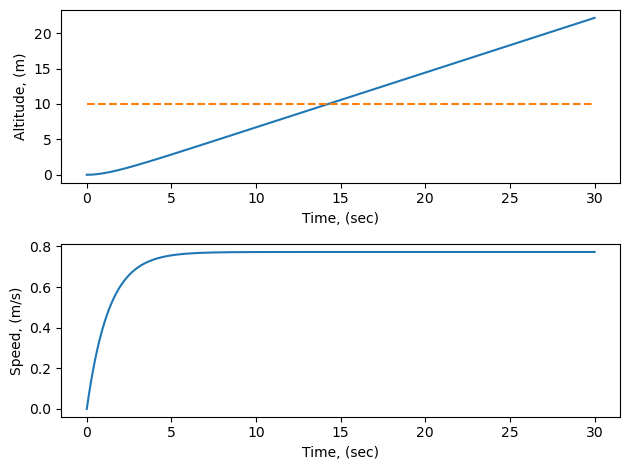

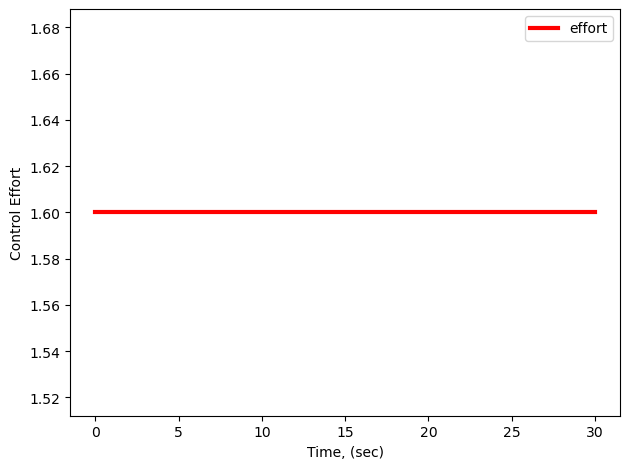

In [29]:
# Plot results
# Plot 1: This is the altitude of our quad copter as a function of time!
SP = np.ones_like(time)*r # altitude set point
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(time, soln[:,0],time,SP,'--')
ax1.set_xlabel('Time, (sec)')
ax1.set_ylabel('Altitude, (m)')

# Plot 2: This is the speed of our quad copter as a function of time!
ax2 = fig.add_subplot(212)
ax2.plot(time, soln[:,1])
ax2.set_xlabel('Time, (sec)')
ax2.set_ylabel('Speed, (m/s)')
plt.tight_layout()
plt.show()

# Plot 3: This is the control effort applied to our quad copter as a function of time!
fig2 = plt.figure()
ax3 = fig2.add_subplot(111)
ax3.plot(time, controller.effort_applied, label='effort', linewidth=3, color = 'red')
ax3.set_xlabel('Time, (sec)')
ax3.set_ylabel('Control Effort')
h, l = ax3.get_legend_handles_labels()
ax3.legend(h, l)
plt.tight_layout()
plt.show()
##################

In [31]:
y0 = soln[:,0] #altitude
rise_time_index =  np.argmax(y0>r)
RT = time[rise_time_index]
print("The rise time is {0:.3f} seconds".format(RT))

OS = (np.max(y0) - r)/r*100
if OS < 0:
    OS = 0
print("The percent overshoot is {0:.1f}%".format(OS))

print ("The offset from the target at 30 seconds is {0:.3f} meters".format(abs(soln[-1,0]-r)))

The rise time is 14.309 seconds
The percent overshoot is 121.5%
The offset from the target at 30 seconds is 12.154 meters


In [13]:
kp = 0.76
##################################################################################
# Core simulation code
# Inital conditions (i.e., initial state vector)
y = [0, 0]
   #y[0] = initial altitude, (m)
   #y[1] = initial speed, (m/s)

# Initialize array to store values
soln = np.zeros((len(time),len(y)))

# Create instance of P_Controller class
p = P_Controller()

# Set the Kp value of the controller
p.setKP(kp)

# Set altitude target
r = 10 # meters
p.setTarget(r)

# Simulate quadrotor motion
j = 0 # dummy counter
for t in time:
    # Evaluate state at next time point
    y = ydot(y,t,p)
    # Store results
    soln[j,:] = y
    j += 1

##################################################################################

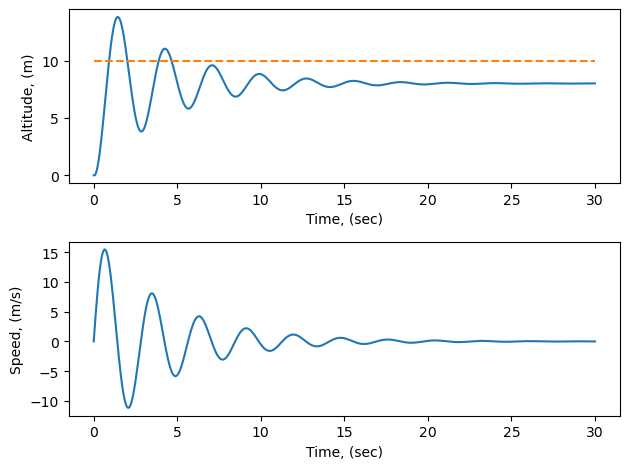

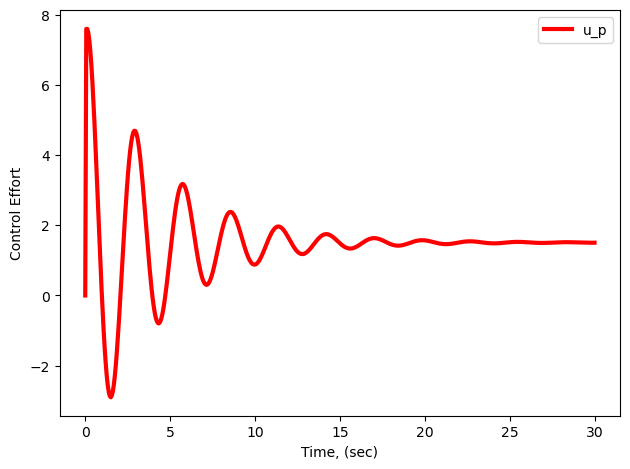

The rise time is 0.962 seconds
The percent overshoot is 38.2%
The steady state offset at 30 seconds is 1.981 meters


In [14]:
# Plot results
SP = np.ones_like(time)*r # altitude set point
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(time, soln[:,0],time,SP,'--')
ax1.set_xlabel('Time, (sec)')
ax1.set_ylabel('Altitude, (m)')

ax2 = fig.add_subplot(212)
ax2.plot(time, soln[:,1])
ax2.set_xlabel('Time, (sec)')
ax2.set_ylabel('Speed, (m/s)')
plt.tight_layout()
plt.show()

fig2 = plt.figure()
ax3 = fig2.add_subplot(111)
ax3.plot(time, p.u_p, label='u_p', linewidth=3, color = 'red')
ax3.set_xlabel('Time, (sec)')
ax3.set_ylabel('Control Effort')
h, l = ax3.get_legend_handles_labels()
ax3.legend(h, l)
plt.tight_layout()
plt.show()
##################
y0 = soln[:,0] #altitude
rise_time_index =  np.argmax(y0>r)
RT = time[rise_time_index]
print("The rise time is {0:.3f} seconds".format(RT))

OS = (np.max(y0) - r)/r*100
if OS < 0:
    OS = 0
print("The percent overshoot is {0:.1f}%".format(OS))

print ("The steady state offset at 30 seconds is {0:.3f} meters".format(abs(soln[-1,0]-r)))

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from pi_controller import PI_Controller
from quad1d_pi import ydot

kp = 0.76
ki = 0.09
# Simulation parameters
N = 500 # number of simulation points
t0 = 0  # starting time, (sec)
tf = 30 # end time, (sec)
time = np.linspace(t0, tf, N)
dt = time[1] - time[0] # delta t, (sec)



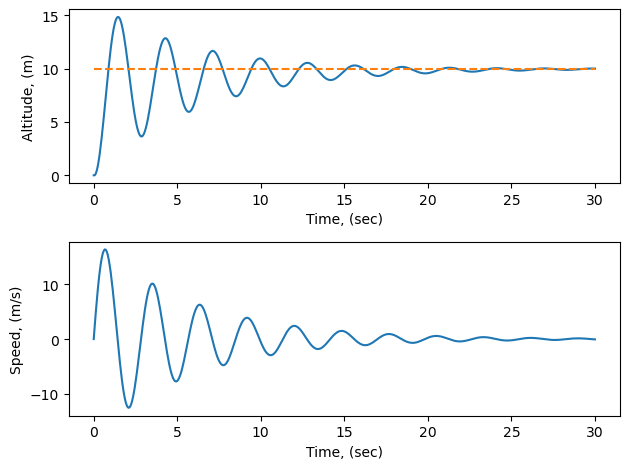

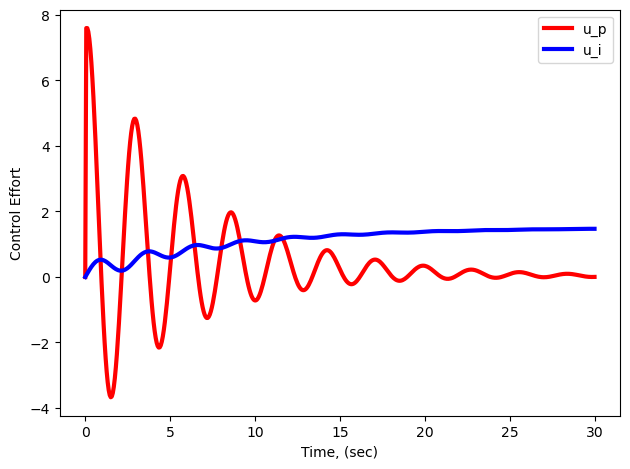

The rise time is 0.902 seconds
The percent overshoot is 48.3%
The steady state offset at 30 seconds is 0.006 meters


In [20]:
##################################################################################
# Core simulation code
# Inital conditions (i.e., initial state vector)
y = [0, 0]
   #y[0] = initial altitude, (m)
   #y[1] = initial speed, (m/s)

# Initialize array to store values
soln = np.zeros((len(time),len(y)))

# Create instance of PI_Controller class
pi = PI_Controller()

# Set the Kp value of the controller
pi.setKP(kp)

# Set the Ki value of the controller
pi.setKI(ki)

# Set altitude target
r = 10 # meters
pi.setTarget(r)

# Simulate quadrotor motion
j = 0 # dummy counter
for t in time:
    # Evaluate state at next time point
    y = ydot(y,t,pi)
    # Store results
    soln[j,:] = y
    j += 1

##################################################################################
# Plot results
SP = np.ones_like(time)*r # altitude set point
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(time, soln[:,0],time,SP,'--')
ax1.set_xlabel('Time, (sec)')
ax1.set_ylabel('Altitude, (m)')

ax2 = fig.add_subplot(212)
ax2.plot(time, soln[:,1])
ax2.set_xlabel('Time, (sec)')
ax2.set_ylabel('Speed, (m/s)')
plt.tight_layout()
plt.show()

fig2 = plt.figure()
ax3 = fig2.add_subplot(111)
ax3.plot(time, pi.u_p, label='u_p', linewidth=3, color = 'red')
ax3.plot(time, pi.u_i, label='u_i', linewidth=3, color = 'blue')
ax3.set_xlabel('Time, (sec)')
ax3.set_ylabel('Control Effort')
h, l = ax3.get_legend_handles_labels()
ax3.legend(h, l)
plt.tight_layout()
plt.show()
##################
y0 = soln[:,0] #altitude
rise_time_index =  np.argmax(y0>r)
RT = time[rise_time_index]
print("The rise time is {0:.3f} seconds".format(RT))

OS = (np.max(y0) - r)/r*100
if OS < 0:
    OS = 0
print("The percent overshoot is {0:.1f}%".format(OS))

print ("The steady state offset at 30 seconds is {0:.3f} meters".format(abs(soln[-1,0]-r)))